Importing The Dependencies

In [4]:
import os
import json
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [5]:
kaggle_config = json.load(open('kaggle.json'))

In [6]:
kaggle_config.keys()

dict_keys(['username', 'key'])

In [7]:
os.environ['KAGGLE_USERNAME'] = kaggle_config['username']
os.environ['KAGGLE_KEY'] = kaggle_config['key']

Getting The Dataset

In [8]:
#!/bin/bash
!kaggle datasets download notshrirang/spotify-million-song-dataset

Dataset URL: https://www.kaggle.com/datasets/notshrirang/spotify-million-song-dataset
License(s): CC0-1.0
  0% 0.00/20.7M [00:00<?, ?B/s]
100% 20.7M/20.7M [00:00<00:00, 1.23GB/s]


In [9]:
!ls

kaggle.json  sample_data  spotify-million-song-dataset.zip


In [10]:
with zipfile.ZipFile('spotify-million-song-dataset.zip', 'r') as zip_ref:
  zip_ref.extractall()

In [11]:
df = pd.read_csv("/content/spotify_millsongdata.csv")

EDA

In [12]:
df.shape

(57650, 4)

In [24]:
df.head()

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57650 entries, 0 to 57649
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   artist  57650 non-null  object
 1   song    57650 non-null  object
 2   link    57650 non-null  object
 3   text    57650 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


In [23]:
df.isnull().sum()

,0
artist,0
song,0
link,0
text,0


In [31]:
top_artists = df['artist'].value_counts().head(5)
print('\nTop 5 Artists : ')
print(top_artists)


Top 5 Artists : 
artist
Donna Summer        191
Gordon Lightfoot    189
Bob Dylan           188
George Strait       188
Loretta Lynn        187
Name: count, dtype: int64


In [40]:
df1 = df.sample(10000)
df1 = df1 .drop('link', axis = 1).reset_index(drop=True)

In [41]:
df1.shape

(10000, 3)

In [42]:
df1.head()

,artist,song,text
0,Yngwie Malmsteen,Bad Blood,"One word is spoken, and the silence breaks \r..."
1,Hank Williams,Battle Of Armegeddon,Written by roy acuff and odell mcleod \r\nRec...
2,Natalie Grant,Captured,It must mean something \r\nWhen I close my ey...
3,Carly Simon,Not A Day Goes By,Not a day goes by \r\nNot a single day \r\nB...
4,Imagine Dragons,Trouble,"[Verse 1] \r\nOh quiet down, I've had enough ..."


In [43]:
all_lyrics = " ".join(df1['text'].dropna())
wordcloud = WordCloud(width = 1000, height = 500).generate(all_lyrics)

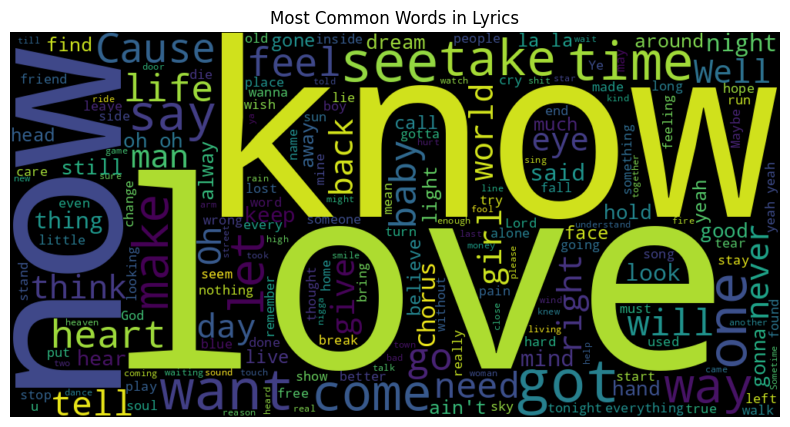

In [45]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title("Most Common Words in Lyrics")
plt.show()

Data Preprocessing